In [322]:
# imports
from torch import nn
import torch
import torch.nn.functional as F

import os
import paths
import numpy as np
import pandas as pd
import importlib
import scipy.io as io
import datetime
from sklearn.metrics import r2_score
import sklearn.preprocessing as preproc
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt

In [696]:
# Load the Meyer data
importlib.reload(paths)
# define the file to load
target_file = 'example_freely_moving.npy'

# assemble the full path
load_path = os.path.join(paths.data_path, target_file)

# load the file
data = np.load(load_path)
# load the column names
columns = paths.meyer_columns
# assemble a dataframe
data_df = pd.DataFrame(data, columns=columns)[['roll', 'pitch', 'pitch_vel', 'roll_vel', 'yaw_vel', 'pupil_r_v', 'pupil_l_v', 'pupil_r_h', 'pupil_l_h']].to_numpy()
# rename the columns
data_df = pd.DataFrame(data_df, columns=['head_roll', 'head_tilt', 'pitch_vel', 'roll_vel', 'yaw_vel', 'eye_r_v', 'eye_l_v', 'eye_r_h', 'eye_l_h'])


print(columns)
print(data_df)

['timestamp', 'pitch', 'roll', 'pitch_vel', 'roll_vel', 'yaw_vel', 'pupil_l_h', 'pupil_l_v', 'pupil_r_h', 'pupil_r_v']
       head_roll  head_tilt   pitch_vel    roll_vel     yaw_vel    eye_r_v  \
0      20.001065 -27.272107  104.555303  -54.612166  474.530694        NaN   
1      20.812317 -26.870819   59.359514  -97.330820  421.305060        NaN   
2      21.914893 -25.921034   42.891156 -106.084538  361.668284        NaN   
3      23.204492 -24.963030   36.219201 -102.326728  288.762512        NaN   
4      24.166380 -24.429489    0.696858  -49.549902  219.352208  45.117962   
...          ...        ...         ...         ...         ...        ...   
36009  23.322529  -5.129397  -41.187362   60.579750   10.956741        NaN   
36010  22.835476  -4.297887  -50.574501   16.956855   -6.383211        NaN   
36011  22.241257  -3.479114  -30.349570  -21.053428   45.009487        NaN   
36012  21.701235  -2.508238  -15.561884    4.347795   44.293878        NaN   
36013  21.405145  -1.65

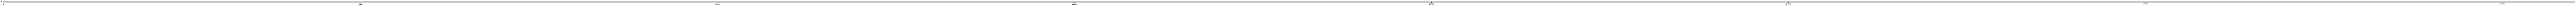

In [34]:
# plot the data

fig = plt.figure(figsize=(300, 10))
ax = fig.add_subplot(111)

# data[np.isnan(data)] = 0
# ax.imshow(data)
ax.imshow(data[:, :].T)
plt.show()

In [752]:
# load the Michaiel data

# Load the Meyer data
importlib.reload(paths)
# define the file to load
target_file = 'Michaiel_et_al.2020_fullDataset.mat'

# assemble the full path
load_path = os.path.join(paths.data_path, target_file)

# load the mat file
data = io.loadmat(load_path)
print(data.keys())

# define the columns of interest
column_list = ['animalName', 'expSession', 'accelerometerChs', 'dist2cricket', 'phiL', 'phiR', 'thetaL', 'thetaR']

# get only the columns of interest
# allocate the output list
data_df = []
# for all the columns
for idx, column in enumerate(column_list):
    temp_data = data[column]
    # if it's the accelerometer
    if column == 'accelerometerChs':
        temp_columns = [el[0][:, :3] for el in temp_data]
    elif column == 'animalName':
        _, animal_idx = [el[1] for el in np.unique(temp_data, return_index=True)]
        temp_columns = [np.array([animal_idx]*el[0].shape[1]).reshape(-1, 1) for idx, el in enumerate(data['phiL'])]
    elif column == 'expSession':
        temp_columns = [np.array([idx]*el[0].shape[1]).reshape(-1, 1) for idx, el in enumerate(data['phiL'])]
    elif column == 'mouseVel':
        temp_columns = [el[0, :].reshape(-1, 1) for el in temp_data[0]]
    else:
        temp_columns = [el[0][0, :].reshape(-1, 1) for el in temp_data]
    # concatenate the trials
    data_df.append(np.vstack(temp_columns))
# print([type(el[0][0]) for el in data_df])
# turn into a dataframe
# data_df = pd.DataFrame(np.hstack(data_df), columns=['mouse', 'trial', 'head_roll', 'head_tilt', 'head_yaw', 'eye_r_v', 'eye_l_v', 'eye_r_h', 'eye_l_h'])
# data_df = pd.DataFrame(np.hstack(data_df), columns=['mouse', 'trial', 'head_roll', 'head_tilt', 'head_yaw', 'vel_roll', 'vel_tilt', 'vel_yaw', 'eye_r_v', 'eye_l_v', 'eye_r_h', 'eye_l_h'])
data_df = pd.DataFrame(np.hstack(data_df), columns=['mouse', 'trial', 'head_roll', 'head_tilt', 'head_yaw', 'prey_dist', 'eye_r_v', 'eye_l_v', 'eye_r_h', 'eye_l_h'])
# print(data[0].shape)
print(data_df)
# print(data['allRoll'].shape)

dict_keys(['__header__', '__version__', '__globals__', 'accelerometerChs', 'accelerometerChsRaw', 'allAppT', 'allAvgPhi', 'allGyroYaw', 'allRoll', 'allTilt', 'allYaw', 'animalName', 'approachEpochs', 'azimuth', 'clipNumber', 'cricketTheta', 'cricket_xy', 'crickeyVel', 'dPhiL', 'dTheta', 'dThetaL', 'dVergence', 'd_allAvgPhi', 'd_headThDLC', 'dist2cricket', 'dphiR', 'dthetaR', 'expDate', 'expSession', 'eyeScaleL', 'eyeScaleR', 'eyeSlopeL', 'eyeSlopeR', 'eyefitParamsL', 'eyefitParamsR', 'headThDLC', 'headTheta', 'mouseVel', 'mouse_xy', 'phiL', 'phiR', 'thetaL', 'thetaR', 'vergence'])
        mouse  trial  head_roll  head_tilt   head_yaw  prey_dist    eye_r_v  \
0        23.0    0.0  45.003072  21.426359 -30.691180  21.351202   0.234920   
1        23.0    0.0  45.386402  23.125182 -29.726245  21.226822   0.751582   
2        23.0    0.0  45.769732  24.824006 -28.761310  21.076709   1.171419   
3        23.0    0.0  46.010245  25.889899 -28.155881  20.943488   2.790307   
4        23.0    

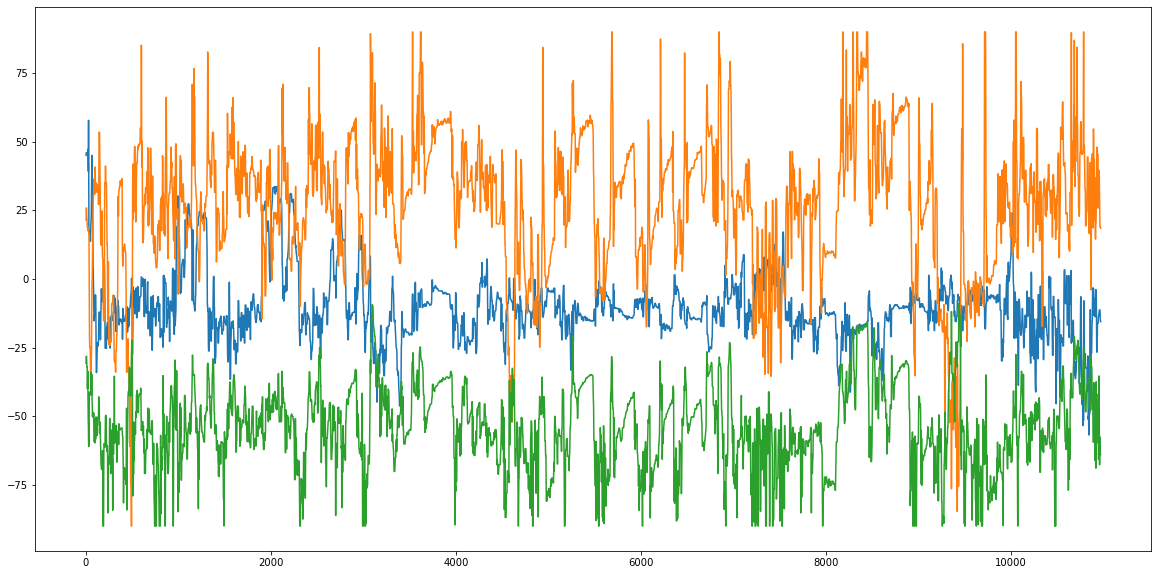

In [666]:
# plot a single trial

for idx, trial in data_df.groupby(['trial'])[['head_roll', 'head_tilt', 'head_yaw']]:
    if idx > 0:
        break
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    ax.plot(trial)

In [634]:
def train(args, model, train_loader, optimizer,
          reg_function1=None, reg_function2=None, criterion=F.nll_loss):
    """
    Trains the current inpur model using the data
    from Train_loader and Updates parameters for a single pass
    """
    device = args['device']
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
#     data = torch.cat([el[0] for el in train_loader])
#     target = torch.cat([el[1] for el in train_loader])
#         print(data.shape)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        #     if reg_function1 is None:
        loss = criterion(output, target)
        #     elif reg_function2 is None:
        #       loss = criterion(output, target)+args['lambda']*reg_function1(model)
        #     else:
        #       loss = criterion(output, target) + args['lambda1']*reg_function1(model) + args['lambda2']*reg_function2(model)
        loss.backward()
        optimizer.step()

    return model


def test(model, test_loader, criterion=F.nll_loss, device='cpu'):
    """
    Tests the current Model
    """
    model.eval()
    test_loss = 0
    r2 = np.array([0.0, 0.0, 0.0, 0.0])
#     r2_list = []
#     correct = 0
    with torch.no_grad():
        for data, target in test_loader:
#         data = [el[0] for el in train_loader]
#         target = [el[1] for el in train_loader]
            data, target = data.to(device), target.to(device)
            output = model(data)
    #             print(criterion)
    #             print(output)
    #             print(target)
            test_loss += criterion(output, target).item()
#             r2_list.append(r2_score(target.to('cpu'), output.to('cpu')))
            target, output = target.to('cpu'), output.to('cpu')
            r2a = r2_score(target[:, 0], output[:, 0])
            r2b = r2_score(target[:, 1], output[:, 1])
            r2c = r2_score(target[:, 2], output[:, 2])
            r2d = r2_score(target[:, 3], output[:, 3])
            
            r2 += np.array([r2a, r2b, r2c, r2d])
#             r2 += r2_score(target.to('cpu'), output.to('cpu'))
        # sum up batch loss
    #             print(test_loss)
    #             pred = output.argmax(dim=0, keepdim=True)  # get the index of the max log-probability
    #             correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader)
    r2 /= len(test_loader)
    return r2, test_loss

In [751]:
# preprocess the data

# define the target columns for scaling
# target_columns = ['head_roll', 'head_tilt', 'head_yaw', 'eye_r_v', 'eye_l_v', 'eye_r_h', 'eye_l_h']
# target_columns = ['head_roll', 'head_tilt', 'eye_r_v', 'eye_l_v', 'eye_r_h', 'eye_l_h']
# target_columns = ['head_roll', 'head_tilt', 'pitch_vel', 'roll_vel', 'yaw_vel', 'eye_r_v', 'eye_l_v', 'eye_r_h', 'eye_l_h']
# target_columns = ['head_roll', 'head_tilt', 'head_yaw', 'vel_roll', 'vel_tilt', 'vel_yaw', 'eye_r_v', 'eye_l_v', 'eye_r_h', 'eye_l_h']
target_columns = ['head_roll', 'head_tilt', 'head_yaw', 'prey_dist', 'eye_r_v', 'eye_l_v', 'eye_r_h', 'eye_l_h']

# copy the loaded data
nonan_data = data_df.copy()

# # use the distance to prey to get only the non-prey-capture periods
# no_prey = ~np.isnan(nonan_data.loc[:, 'prey_dist'])
# target_columns = [el for el in target_columns if el != 'prey_dist']
# nonan_data = nonan_data.loc[no_prey, :]

# remove the nan values
nonan_data = nonan_data.loc[~np.any(np.isnan(nonan_data.to_numpy()), axis=1), :]

# normalize per trial
norm_data = []
for idx, trial in nonan_data.groupby(['trial'])[target_columns]:
    #normalize according to the target column
    norm_data.append(preproc.StandardScaler().fit_transform(trial))
# reassemble the dataframe
nonan_data = pd.DataFrame(np.vstack(norm_data), columns=target_columns)

# # normalize
# nonan_data = preproc.StandardScaler().fit_transform(nonan_data.to_numpy())
# nonan_data = pd.DataFrame(nonan_data, columns=target_columns)

# define the input and output
# nonan_input = nonan_data.loc[:, ['head_roll', 'head_tilt', 'head_yaw']].to_numpy()
# nonan_input = nonan_data.loc[:, ['head_roll', 'head_tilt', 'pitch_vel', 'roll_vel', 'yaw_vel']].to_numpy()
# nonan_input = nonan_data.loc[:, ['head_roll', 'head_tilt', 'head_yaw', 'vel_roll', 'vel_tilt', 'vel_yaw']].to_numpy()
nonan_input = nonan_data.loc[:, ['head_roll', 'head_tilt', 'head_yaw']].to_numpy()
nonan_output = nonan_data.loc[:, ['eye_r_v', 'eye_l_v', 'eye_r_h', 'eye_l_h']].to_numpy()
# define the number of past times points to include
time_points = 10
if time_points > 1:
    # get the source matrix
    padding = np.zeros((time_points, nonan_input.shape[1]))
    source_matrix = np.concatenate((padding, nonan_input), axis=0)
    # allocate the output matrix
    nonan_input = np.zeros((nonan_input.shape[0], nonan_input.shape[1]*time_points))
    # populate the output matrix
    for el in np.arange(nonan_input.shape[0]):
        nonan_input[el, :] = source_matrix[el:el+time_points, :].flatten()

# # augment by adding random noise
# # define the range of the random noise
# random_range = 0.5
# augmented_array = nonan_input.copy() + np.random.rand(nonan_input.shape[0], nonan_input.shape[1])
# nonan_input = np.concatenate((nonan_input, augmented_array), axis=0)
# nonan_output = np.concatenate((nonan_output, nonan_output), axis=0)
print(nonan_input.shape)

# define the batch size
batch_size = 10000

# tensor_head = torch.tensor(nonan_data.loc[:, ['pitch', 'roll']].to_numpy()).float()
# tensor_eyes = torch.tensor(nonan_data.loc[:, ['pupil_l_h', 'pupil_l_v', 'pupil_r_h', 'pupil_r_v']].to_numpy()).float()

tensor_head = torch.split(torch.tensor(nonan_input).float(), batch_size)
tensor_eyes = torch.split(torch.tensor(nonan_output).float(), batch_size)
# concatenate
all_data = [(tensor_head[el], tensor_eyes[el]) for el in np.arange(len(tensor_head))]


print(len(all_data))

(343090, 30)
35


In [738]:
# Split the data

# define the test/train split
test_split = 20
train_split = 100 - test_split
# calculate the actual lengths
test_length = int(np.round(len(all_data)*test_split/100))
train_length = len(all_data) - test_length

# test_length = 1000
# train_length = 2000
val_length = len(all_data) - (test_length + train_length)

# perform the split
train_loader, val_loader, _ = torch.utils.data.random_split(all_data, [train_length, test_length, val_length])

# # take only a single batch (use for debugging)
# train_loader = [train_loader[el] for el in np.arange(1)]
# val_loader = [val_loader[el] for el in np.arange(1)]

print(f'Train set size: {len(train_loader)}')
print(f'Test set size: {len(val_loader)}')
# print(train_loader[0])

Train set size: 15
Test set size: 4


In [739]:
# define the architecture
class Neural_Net(nn.Module):

    def __init__(self):
        super(Neural_Net, self).__init__()
        self.fc1 = nn.Linear(nonan_input.shape[1], 500)
        self.fc2 = nn.Linear(500, 300)
        self.fc3 = nn.Linear(300, 200)
        self.fc4 = nn.Linear(200, 100)
        self.fc5 = nn.Linear(100, 4)
        self.dropout = nn.Dropout()

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.fc5(x)
        return x

In [740]:
# Instantiate and define loss, optimizer, epochs
model = Neural_Net()
# cost_func = nn.MSELoss()
# cost_func = nn.L1Loss()
cost_func = nn.SmoothL1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 1000

In [741]:
# new train/test loop
device = 'cuda'
args = {
    'device': device
}
model = model.to(device)
train_acc_list = []
val_acc_list = []
train_loss_list = []
val_loss_list = []

for epoch in range(epochs):
    trained_model = train(args, model, train_loader, optimizer,
                          reg_function1=None,
                          reg_function2=None, criterion=cost_func)
    train_acc, train_loss = test(trained_model, train_loader, device=device, criterion=cost_func)
    val_acc, val_loss = test(trained_model, val_loader, device=device, criterion=cost_func)
    #     param_norm = calculate_frobenius_norm(trained_model)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    
    if (epoch % 100 == 0):
        print(f'Train accuracy: {train_acc}')
        print(f'Test accuracy: {val_acc}')
        print(f'Current epoch: {epoch}')
    #     param_norm_list.append(param_norm)

Train accuracy: [0.299276   0.34952216 0.33258844 0.2408845 ]
Test accuracy: [0.38999447 0.42235668 0.34519909 0.20916068]
Current epoch: 0
Train accuracy: [0.47008054 0.5036737  0.50159703 0.37940522]
Test accuracy: [0.56190112 0.57344421 0.500121   0.37202738]
Current epoch: 100
Train accuracy: [0.49322556 0.52403108 0.52255539 0.40643698]
Test accuracy: [0.55748562 0.57494607 0.50025372 0.37100917]
Current epoch: 200
Train accuracy: [0.51316443 0.53993723 0.53655515 0.42313319]
Test accuracy: [0.55594912 0.57168318 0.49992208 0.36445422]
Current epoch: 300
Train accuracy: [0.52631914 0.54967055 0.54639006 0.43781983]
Test accuracy: [0.55419167 0.56756958 0.49753359 0.36167012]
Current epoch: 400
Train accuracy: [0.53318253 0.55769144 0.55326289 0.44741105]
Test accuracy: [0.55151776 0.57186954 0.49949415 0.36086952]
Current epoch: 500
Train accuracy: [0.53880296 0.56314769 0.55825533 0.45636551]
Test accuracy: [0.54467268 0.568852   0.5000984  0.35028578]
Current epoch: 600
Train ac

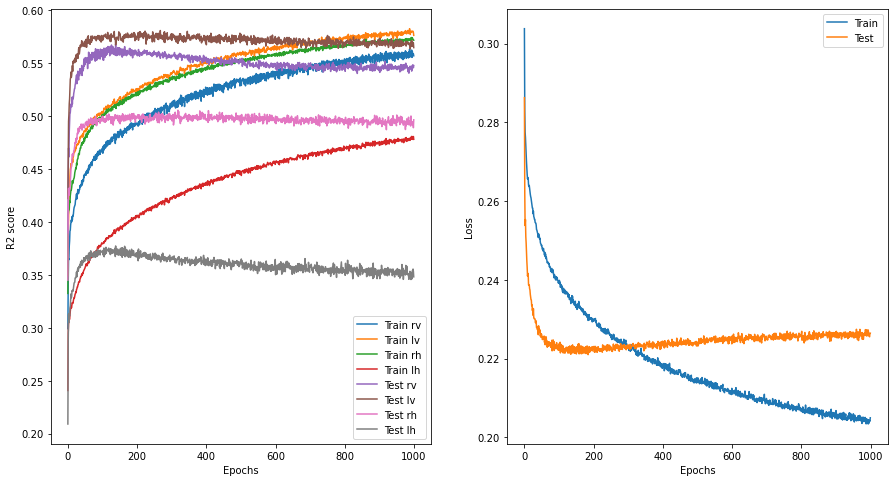

In [742]:
# plot accuracies over epoch

# define the plot range
plot_range = [0, epochs]

x = np.arange(plot_range[0], plot_range[1])

fig = plt.figure(figsize=(15,8))
ax0 = fig.add_subplot(121)
ax0.plot(x, train_acc_list[plot_range[0]:plot_range[1]])
ax0.plot(x, val_acc_list[plot_range[0]:plot_range[1]])
plt.ylabel('R2 score')
plt.xlabel('Epochs')
# plt.legend(['Train rv', 'Test rv', 'Train lv', 'Test lv', 'Train rh', 'Test rh', 'Train lh', 'Test lh'])
plt.legend(['Train rv', 'Train lv', 'Train rh', 'Train lh', 'Test rv', 'Test lv', 'Test rh', 'Test lh'])

ax1 = fig.add_subplot(122)
ax1.plot(x, train_loss_list[plot_range[0]:plot_range[1]])
ax1.plot(x, val_loss_list[plot_range[0]:plot_range[1]])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])

In [105]:
# Export the model

# assemble the export path
# export_name = datetime.datetime.now().strftime("%m_%d_%Y_%H_%M_%S") + '_eyemodel.onnx'
# export_path = os.path.join(paths.model_path, export_name)

# torch.onnx.export(model,                              # model being run
#                   tensor_head[0],                       # model dummy input (or a tuple for multiple inputs)
#                   export_path,                  # where to save the model (can be a file or file-like object)
#                   export_params=True,                 # store the trained parameter weights inside the model file
#                   opset_version=9,                    # the ONNX version to export the model to
#                   do_constant_folding=True,           # whether to execute constant folding for optimization
#                   input_names=['head_angles'],                # the model's input names
#                   output_names=['eye_position']                # the model's output names
#                   )